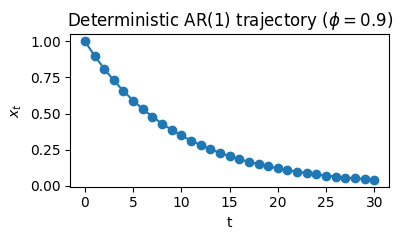

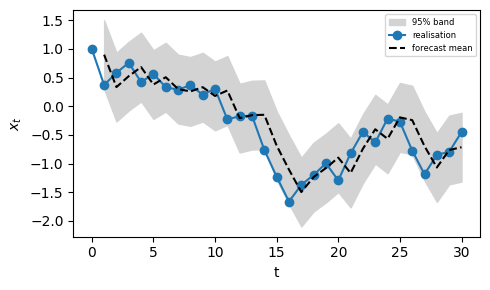

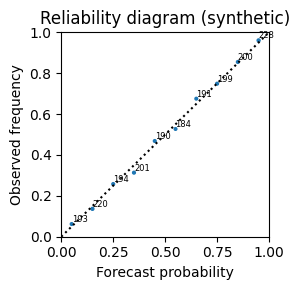

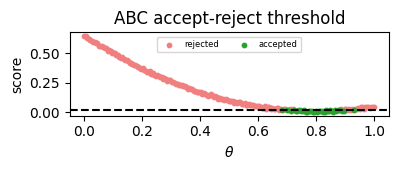

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Deterministic AR(1) trajectory
phi = 0.9
T = 30
x_det = np.zeros(T+1)
x_det[0] = 1.0
for t in range(T):
    x_det[t+1] = phi * x_det[t]

plt.figure(figsize=(4,2.5))
plt.plot(range(T+1), x_det, marker='o')
plt.title("Deterministic AR(1) trajectory ($\\phi=0.9$)")
plt.xlabel("t")
plt.ylabel("$x_t$")
plt.tight_layout()
plt.show()

# 2. Stochastic AR(1) with predictive uncertainty
sigma = 0.3
x_sto = np.zeros(T+1)
x_sto[0] = 1.0
mean_forecast = np.zeros(T)
unc_band_low = np.zeros(T)
unc_band_high = np.zeros(T)
for t in range(T):
    mean_forecast[t] = phi * x_sto[t]
    unc_band_low[t] = mean_forecast[t] - 2*sigma
    unc_band_high[t] = mean_forecast[t] + 2*sigma
    x_sto[t+1] = mean_forecast[t] + np.random.normal(scale=sigma)

plt.figure(figsize=(5,3))
plt.fill_between(range(1,T+1), unc_band_low, unc_band_high, color='lightgray', label='95% band')
plt.plot(range(T+1), x_sto, marker='o', label='realisation')
plt.plot(range(1,T+1), mean_forecast, 'k--', label='forecast mean')
plt.xlabel("t")
plt.ylabel("$x_t$")
plt.legend(fontsize=6)
plt.tight_layout()
plt.show()

# 3. Reliability diagram mock-up
np.random.seed(0)
N = 2000
p = np.random.rand(N)        # forecast probs
y = np.random.binomial(1, p) # outcomes
bins = np.linspace(0,1,11)
bin_indices = np.digitize(p, bins)-1
bin_centers = 0.5*(bins[:-1]+bins[1:])
obs_freq = [y[bin_indices==k].mean() if np.any(bin_indices==k) else np.nan for k in range(10)]
counts = np.bincount(bin_indices, minlength=10)

plt.figure(figsize=(3,3))
plt.plot([0,1],[0,1],'k:', label='perfect')
plt.scatter(bin_centers, obs_freq, s=counts*0.02, color='tab:blue')
for k in range(10):
    if not np.isnan(obs_freq[k]):
        plt.text(bin_centers[k], obs_freq[k], counts[k], fontsize=6, va='bottom')
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel("Forecast probability")
plt.ylabel("Observed frequency")
plt.title("Reliability diagram (synthetic)")
plt.tight_layout()
plt.show()

# 4. ABC acceptance along parameter axis
theta_true = 0.8
theta_grid = np.linspace(0,1,200)
scores = (theta_grid - theta_true)**2 + 0.02*np.random.rand(len(theta_grid))
eps = 0.02
accepted = scores < eps

plt.figure(figsize=(4,1.8))
plt.scatter(theta_grid[~accepted], scores[~accepted], color='lightcoral', s=10, label='rejected')
plt.scatter(theta_grid[accepted], scores[accepted], color='tab:green', s=10, label='accepted')
plt.axhline(eps, color='k', linestyle='--')
plt.xlabel("$\\theta$")
plt.ylabel("score")
plt.title("ABC accept-reject threshold")
plt.legend(fontsize=6, loc='upper center', ncol=2)
plt.tight_layout()
plt.show()


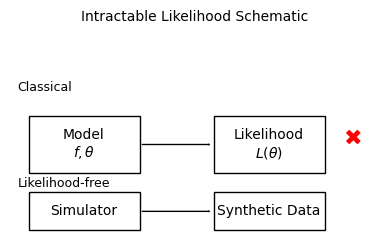

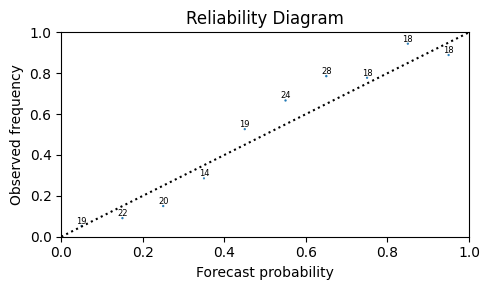

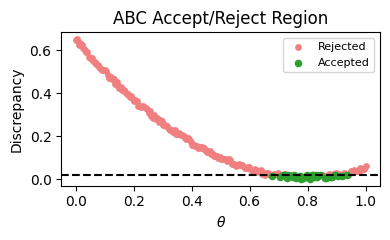

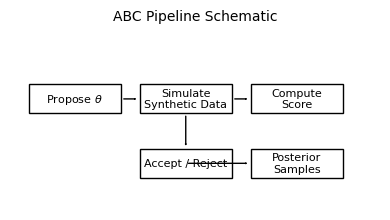

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle
from matplotlib import gridspec

# 1. Intractable Likelihood Schematic
fig1 = plt.figure(figsize=(4,2.5))
ax1 = fig1.add_subplot(111)
ax1.axis('off')

# Draw model flow
ax1.add_patch(Rectangle((0.05,0.35),0.3,0.3, fill=False, edgecolor='black'))
ax1.text(0.2,0.5,'Model\n$f,\\theta$', ha='center', va='center')
ax1.add_patch(FancyArrowPatch((0.35,0.5),(0.55,0.5), arrowstyle='->'))
ax1.add_patch(Rectangle((0.55,0.35),0.3,0.3, fill=False, edgecolor='black'))
ax1.text(0.7,0.5,'Likelihood\n$L(\\theta)$',ha='center',va='center')
ax1.text(0.9,0.5,'✖', fontsize=16, color='red')  # mark fail

ax1.add_patch(Rectangle((0.05,0.05),0.3,0.2, fill=False, edgecolor='black'))
ax1.text(0.2,0.15,'Simulator',ha='center',va='center')
ax1.add_patch(FancyArrowPatch((0.35,0.15),(0.55,0.15),arrowstyle='->'))
ax1.add_patch(Rectangle((0.55,0.05),0.3,0.2, fill=False, edgecolor='black'))
ax1.text(0.7,0.15,'Synthetic Data',ha='center',va='center')
ax1.text(0.02,0.78,'Classical',fontsize=9)
ax1.text(0.02,0.28,'Likelihood-free',fontsize=9)
fig1.suptitle('Intractable Likelihood Schematic', fontsize=10)
fig1.tight_layout()
plt.show()

# 2. Reliability diagram
np.random.seed(0)
N=200
p=np.random.rand(N)
y=np.random.binomial(1,p)
bins=np.linspace(0,1,11)
bin_indices=np.digitize(p,bins)-1
bin_centers=0.5*(bins[:-1]+bins[1:])
obs_freq=[y[bin_indices==k].mean() if np.any(bin_indices==k) else np.nan for k in range(10)]
counts=np.bincount(bin_indices, minlength=10)

fig2=plt.figure(figsize=(5,3))
plt.plot([0,1],[0,1],'k:',label='Perfect')
plt.scatter(bin_centers,obs_freq,s=counts*0.02,color='tab:blue')
for k in range(10):
    if not np.isnan(obs_freq[k]):
        plt.text(bin_centers[k],obs_freq[k],counts[k],fontsize=6,va='bottom',ha='center')
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('Forecast probability')
plt.ylabel('Observed frequency')
plt.title('Reliability Diagram')
plt.tight_layout()
plt.show()

# 3. ABC acceptance scatter
theta_true=0.8
theta_grid=np.linspace(0,1,200)
scores=(theta_grid-theta_true)**2 + 0.02*np.random.rand(len(theta_grid))
eps=0.02
accepted=scores<eps

fig3=plt.figure(figsize=(4,2.5))
plt.scatter(theta_grid[~accepted],scores[~accepted],color='lightcoral',s=15,label='Rejected')
plt.scatter(theta_grid[accepted],scores[accepted],color='tab:green',s=20,label='Accepted')
plt.axhline(eps,color='k',linestyle='--')
plt.xlabel('$\\theta$')
plt.ylabel('Discrepancy')
plt.title('ABC Accept/Reject Region')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

# 4. ABC pipeline schematic
fig4=plt.figure(figsize=(4,2.2))
ax4=fig4.add_subplot(111)
ax4.axis('off')

# boxes
boxes=[('Propose $\\theta$',(0.05,0.6)),('Simulate\nSynthetic Data',(0.35,0.6)),('Compute\nScore',(0.65,0.6)),('Accept / Reject',(0.35,0.2)),('Posterior\nSamples',(0.65,0.2))]
for text,(x,y) in boxes:
    ax4.add_patch(Rectangle((x,y),0.25,0.18,fill=False,edgecolor='black'))
    ax4.text(x+0.125,y+0.09,text,ha='center',va='center',fontsize=8)
# arrows
ax4.add_patch(FancyArrowPatch((0.3,0.69),(0.35,0.69),arrowstyle='->'))
ax4.add_patch(FancyArrowPatch((0.6,0.69),(0.65,0.69),arrowstyle='->'))
ax4.add_patch(FancyArrowPatch((0.475,0.6),(0.475,0.38),arrowstyle='->'))
ax4.add_patch(FancyArrowPatch((0.475,0.29),(0.65,0.29),arrowstyle='->'))
fig4.suptitle('ABC Pipeline Schematic',fontsize=10)
fig4.tight_layout()
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/abc_pipeline_column.png'

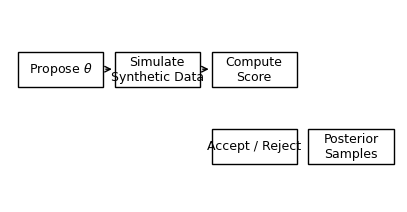

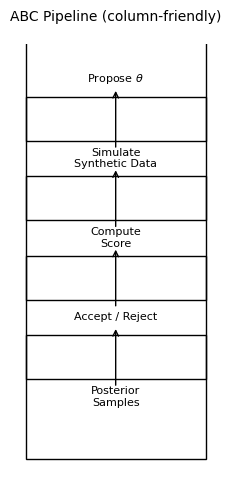

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

fig = plt.figure(figsize=(5, 2.5))
ax = fig.add_subplot(111)
ax.axis('off')

# Box positions and labels
box_w, box_h = 0.22, 0.18
boxes = [
    ('Propose $\\theta$', (0.02, 0.6)),
    ('Simulate\nSynthetic Data', (0.27, 0.6)),
    ('Compute\nScore', (0.52, 0.6)),
    ('Accept / Reject', (0.52, 0.2)),
    ('Posterior\nSamples', (0.77, 0.2))
]

for text, (x, y) in boxes:
    ax.add_patch(Rectangle((x, y), box_w, box_h, fill=False, edgecolor='black'))
    ax.text(x + box_w/2, y + box_h/2, text, ha='center', va='center', fontsize=9)

# Arrows
arrow_kwargs = dict(arrowstyle='->', mutation_scale=10, color='black')
# Row 1 arrows
ax.add_patch(FancyArrowPatch((0.24, 0.69), (0.27, 0.69), **arrow_kwargs))
ax.add_patch(FancyArrowPatch((0.49, 0.69), (0.52, 0.69), **arrow_kwargs))
# Down arrow from Compute Score to Accept/Rejectimport matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# A column-friendly vertical schematic (fits narrow width, ~0.33 page width)
fig = plt.figure(figsize=(2.3, 5.0))
ax = fig.add_subplot(111)
ax.axis('off')

# Box dimensions
box_w, box_h = 0.9, 0.28    # width (axis coords), height

# y-positions for 5 steps (top to bottom)
ys = [0.78, 0.60, 0.42, 0.24, 0.06]
labels = [
    'Propose $\\theta$',
    'Simulate\nSynthetic Data',
    'Compute\nScore',
    'Accept / Reject',
    'Posterior\nSamples'
]

# Draw boxes and text
for y, lab in zip(ys, labels):
    ax.add_patch(Rectangle((0.05, y), box_w, box_h, fill=False, edgecolor='black'))
    ax.text(0.05 + box_w/2, y + box_h/2, lab, ha='center', va='center', fontsize=8)

# Draw arrows between consecutive steps
for i in range(len(ys)-1):
    ax.add_patch(FancyArrowPatch((0.5, ys[i]-0.02), (0.5, ys[i+1]+box_h+0.02),
                                 arrowstyle='->', mutation_scale=10, color='black'))

fig.suptitle('ABC Pipeline (column-friendly)', fontsize=10)
fig.tight_layout()
plt.savefig('/mnt/data/abc_pipeline_column.png', dpi=300)
plt.show()

ax.add_patch(FancyArrowPatch((0.63, 0.6), (0.63, 0.38), **arrow_kwargs))
# Arrow from Accept/Reject to Posterior Samples
ax.add_patch(FancyArrowPatch((0.74, 0.29), (0.77, 0.29), **arrow_kwargs))

fig.tight_layout()
plt.show()
